In [14]:
import pandas as pd
import os

# Define the base path and the years of interest
CSV_PATH = 'D:\\Softwarica\\Thesis File\\Advanced_medical_healthcare_recommendation\\data\\raw\\'
years = list(range(2013, 2022))  # Years from 2013 to 2021

# Initialize an empty list to store DataFrames
df_list = []

# Loop through each year, load the corresponding CSV, and append it to the list
for year in years:
    file_path = os.path.join(CSV_PATH, f'cleaned_ED{year}.csv')
    df_year = pd.read_csv(file_path)
    df_list.append(df_year)

# Concatenate all DataFrames in the list into one main DataFrame
df_combined = pd.concat(df_list, ignore_index=True)

# Save the combined DataFrame to a new CSV file
combined_csv_path = os.path.join('D:\\Softwarica\\Thesis File\\Advanced_medical_healthcare_recommendation\\data\\processed\\', 'combined_ED2013_to_2021.csv')
df_combined.to_csv(combined_csv_path, index=False)
print(f"Combined data saved to {combined_csv_path}")


C:\Users\rakxi\AppData\Local\Temp\ipykernel_20084\4179275201.py:14: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_year = pd.read_csv(file_path)
C:\Users\rakxi\AppData\Local\Temp\ipykernel_20084\4179275201.py:14: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  df_year = pd.read_csv(file_path)
C:\Users\rakxi\AppData\Local\Temp\ipykernel_20084\4179275201.py:14: DtypeWarning: Columns (67,72,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_year = pd.read_csv(file_path)
C:\Users\rakxi\AppData\Local\Temp\ipykernel_20084\4179275201.py:14: DtypeWarning: Columns (67,68,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df_year = pd.read_csv(file_path)
C:\Users\rakxi\AppData\Local\Temp\ipykernel_20084\4179275201.py:14: DtypeWarning: Columns (67,72) have mixed types. Specify dtype option on import or set low_memory=F

Combined data saved to D:\Softwarica\Thesis File\Advanced_medical_healthcare_recommendation\data\processed\combined_ED2013_to_2021.csv


C:\Users\rakxi\AppData\Local\Temp\ipykernel_20084\3821994820.py:7: DtypeWarning: Columns (5,6,7,8,9,18,19,21,23,25,27,29,35,41,47,53,61,67,68,70,71,72,73,74,75,76,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV_PATH + 'combined_ED2013_to_2021.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176697 entries, 0 to 176696
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           176697 non-null  int64  
 1   AgeRecode                     176697 non-null  int64  
 2   Sex                           176697 non-null  int64  
 3   Ethnicity                     176697 non-null  int64  
 4   Race                          176697 non-null  int64  
 5   Temperature                   176697 non-null  object 
 6   HeartRate                     176697 non-null  object 
 7   RespiratoryRate               176697 non-null  object 
 8   SystolicBP                    176697 non-null  object 
 9   DiastolicBP                   176697 non-null  object 
 10  Immediacy                     176697 non-null  int64  
 11  PainScale                     176697 non-null  int64  
 12  Injury                        176697 non-nul

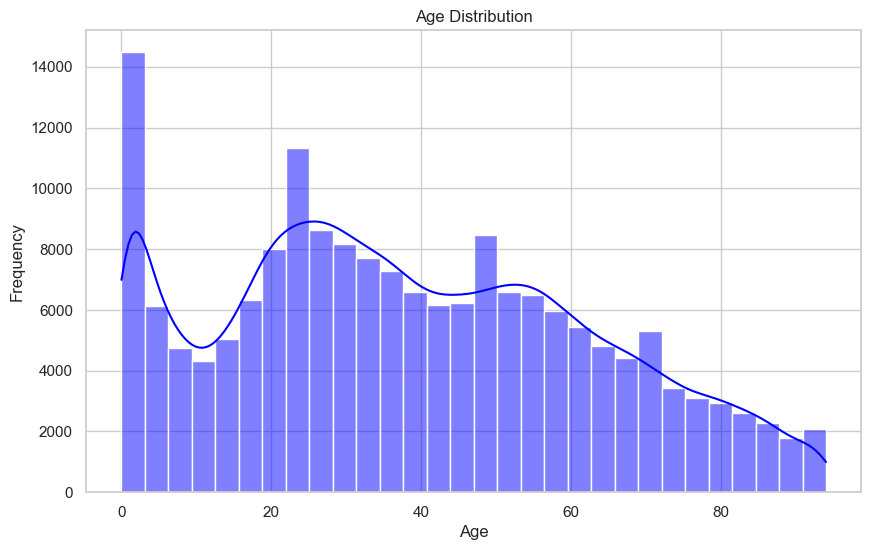

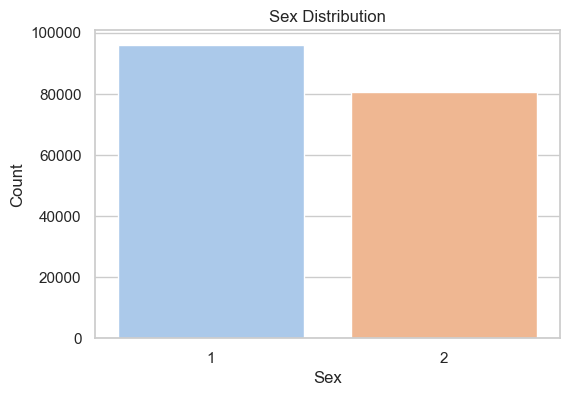

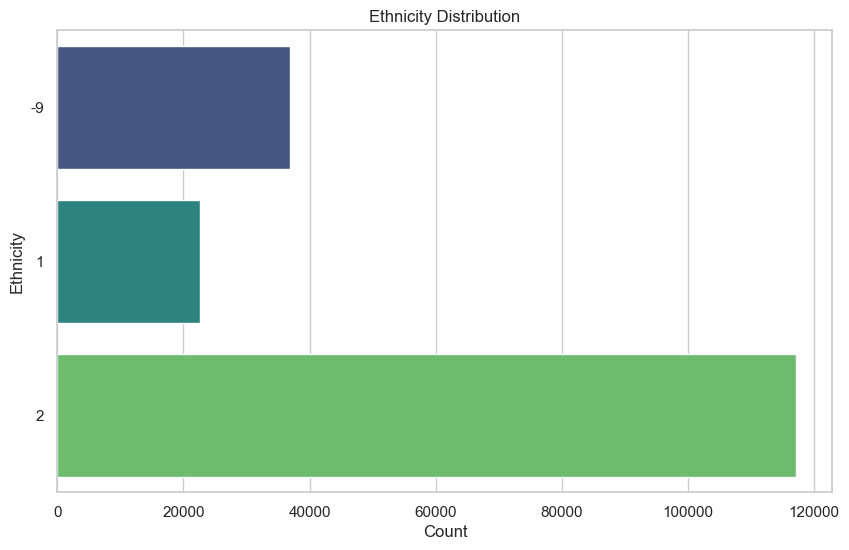

C:\Users\rakxi\AppData\Local\Temp\ipykernel_20084\3821994820.py:59: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')


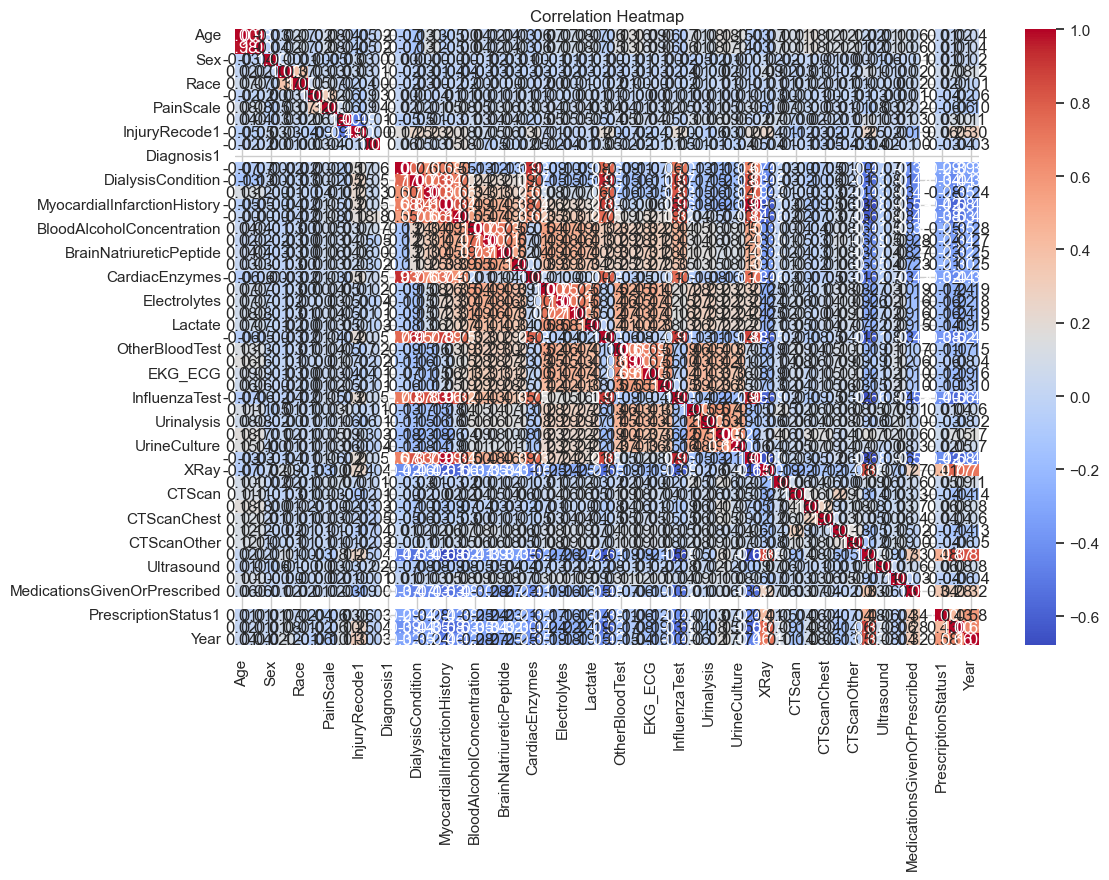

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned combined data
CSV_PATH = 'D:\\Softwarica\\Thesis File\\Advanced_medical_healthcare_recommendation\\data\\processed\\'
df = pd.read_csv(CSV_PATH + 'combined_ED2013_to_2021.csv')

# Replace numerical codes with corresponding descriptions (diagnosis and medication)
# Assuming `diag_mapping` and `med_mapping` are dictionaries mapping codes to descriptions
diag_mapping = {
    # Example: '001': 'Cholera', '002': 'Typhoid fever', ...
}
med_mapping = {
    # Example: 'A01': 'Amoxicillin', 'B01': 'Ibuprofen', ...
}

df['Diagnosis1'] = df['Diagnosis1'].map(diag_mapping)
df['Medication1'] = df['Medication1'].map(med_mapping)

# Set the aesthetic style for the plots
sns.set(style="whitegrid")

# Display basic information about the data
print(df.info())

# Summary statistics for numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# Sex Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=df, palette='pastel')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


# Ethnicity Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Ethnicity', data=df, palette='viridis')
plt.title('Ethnicity Distribution')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.show()

# Correlation heatmap for numerical variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




In [21]:
# Check the first few rows to confirm that Diagnosis1 and Medication1 columns exist and have data
print(df[['Diagnosis1', 'Medication1']].head())

# Check for any missing or NaN values in these columns
print(df[['Diagnosis1', 'Medication1']].isna().sum())


df = df.dropna(subset=['Diagnosis1', 'Medication1'])


   Diagnosis1  Medication1
0         NaN          NaN
1         NaN          NaN
2         NaN          NaN
3         NaN          NaN
4         NaN          NaN
Diagnosis1     176697
Medication1    176697
dtype: int64


In [25]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Most common primary diagnoses
# plt.figure(figsize=(14, 8))
# sns.countplot(y='Diagnosis1', data=df, order=df['Diagnosis1'].value_counts().index[:10], palette='viridis')
# plt.title('Top 10 Primary Diagnoses')
# plt.xlabel('Count')
# plt.ylabel('Diagnosis')
# plt.show()

# # Most prescribed medications
# plt.figure(figsize=(10, 6))
# sns.countplot(y='Medication1', data=df, order=df['Medication1'].value_counts().index[:10], palette='magma')
# plt.title('Top 10 Prescribed Medications')
# plt.xlabel('Count')
# plt.ylabel('Medication')
# plt.show()

# # Trend of most common diagnoses over the years
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=df, x='Year', y='Diagnosis1', estimator='count', hue='Diagnosis1')
# plt.title('Trends in Primary Diagnoses Over the Years')
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.legend(title='Diagnosis')
# plt.show()

# # Trend of most prescribed medications over the years
# plt.figure(figsize=(12, 8))
# sns.lineplot(data=df, x='Year', y='Medication1', estimator='count', hue='Medication1')
# plt.title('Trends in Prescribed Medications Over the Years')
# plt.xlabel('Year')
# plt.ylabel('Count')
# plt.legend(title='Medication')
# plt.show()
